<a href="https://colab.research.google.com/github/Radia74/Learn_Git_v_2/blob/master/Radia_911_Calls_Data_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [ ]:
import numpy as np
import pandas as pd


** Import visualization libraries and set %matplotlib inline. **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [ ]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.isnull().sum()

,0
lat,0
lng,0
desc,0
zip,6559
title,0
timeStamp,1
twp,23
addr,300
e,1


In [ ]:
df['zip']

,zip
0,19525.0
1,19446.0
2,19401.0
3,19401.0
4,NaN
...,...
51083,19038.0
51084,19465.0
51085,19401.0
51086,19401.0


** Check the head of df **

In [ ]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [ ]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


In [ ]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


** What are the top 5 townships (twp) for 911 calls? **

In [ ]:
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [ ]:
# prompt:  What are the top 5 zipcodes for 911 calls? **

df['zip'].value_counts().head(5)

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


** Take a look at the 'title' column, how many unique title codes are there? **

In [ ]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [ ]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [ ]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [ ]:
df['Reason'].value_counts()

,count
Reason,
EMS,48877
Traffic,35695
Fire,14920


In [ ]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


** Now use seaborn to create a countplot of 911 calls by Reason. **

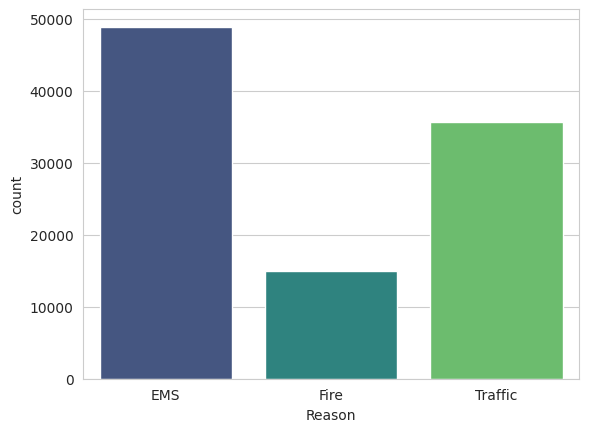

In [ ]:
sns.countplot(x='Reason',data=df,palette='viridis', hue ='Reason')
plt.show()

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [ ]:
print(type(df['timeStamp']))

<class 'pandas.core.series.Series'>


In [ ]:
# prompt: Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

print(type(df['timeStamp'][0]))

<class 'str'>


In [ ]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [ ]:
#df['Hour'].head(3)
#df['Month'].head(3)
#df['Day of Week'].head(7)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [ ]:
print(dmap)

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


In [ ]:
df['Day of Week'].value_counts()

,count
Day of Week,
Tue,15150
Wed,14879
Fri,14833
Mon,14680
Thu,14478
Sat,13336
Sun,12136


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

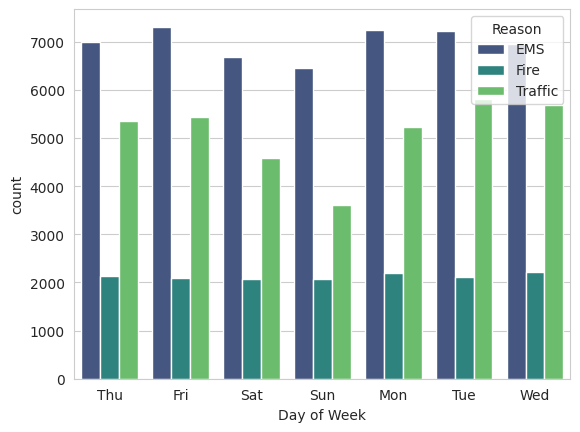

In [ ]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
#matplotlib.legend.Legend at 0x12f614048>
plt.show()

**Now do the same for Month:**

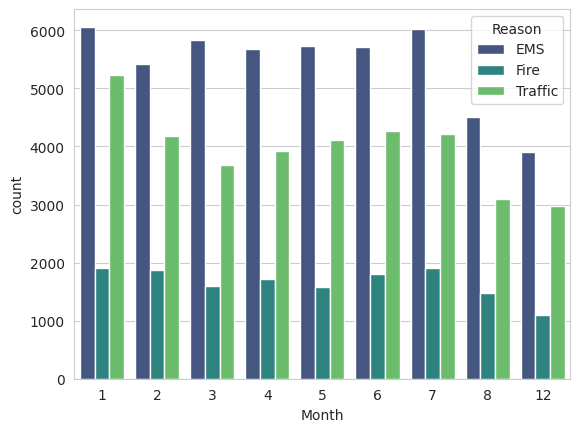

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.show()

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [ ]:
# prompt: You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **
# ** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

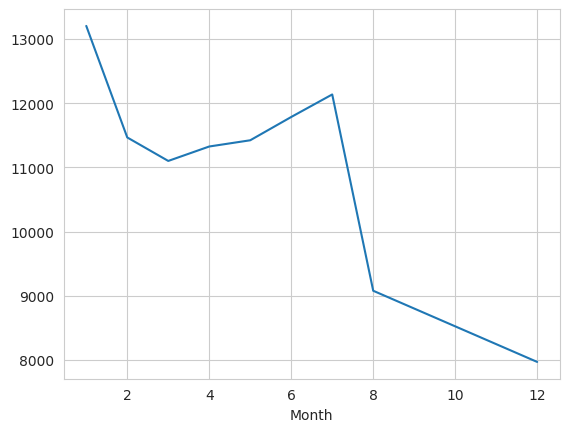

In [ ]:
# prompt: Now create a simple plot off of the dataframe indicating the count of calls per month. **
import matplotlib.pyplot as plt
byMonth['lat'].plot()
plt.show()


In [ ]:
byMonth['lat'].head(5)

,lat
Month,
1,13205
2,11467
3,11101
4,11326
5,11423


** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

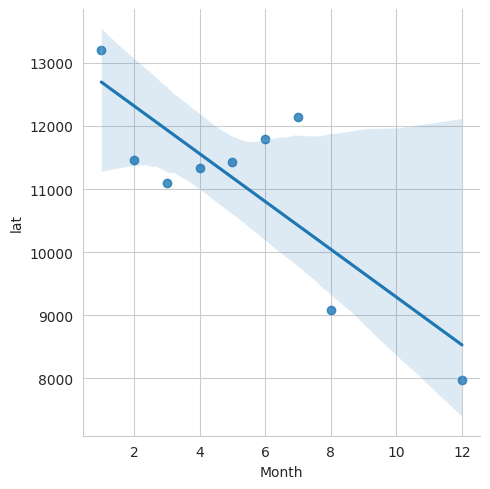

In [ ]:
# prompt:  Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

import matplotlib.pyplot as plt
sns.lmplot(x='Month', y='lat', data=byMonth.reset_index())
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. **

In [ ]:
# prompt: Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. *

df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

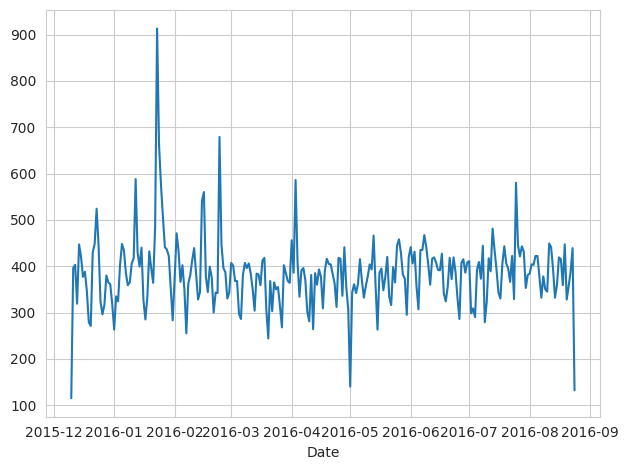

In [ ]:
# prompt: Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

import matplotlib.pyplot as plt
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.show()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

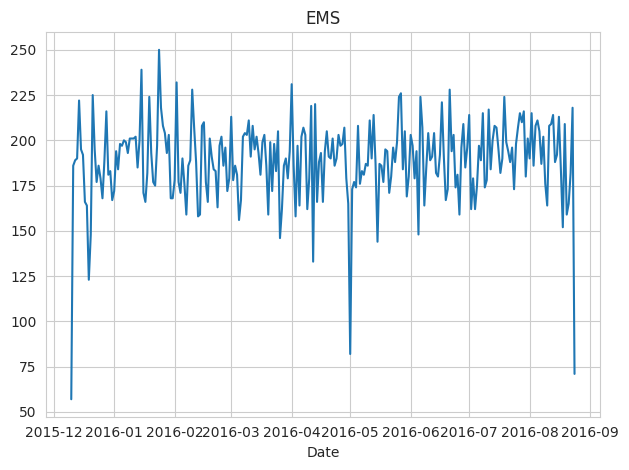

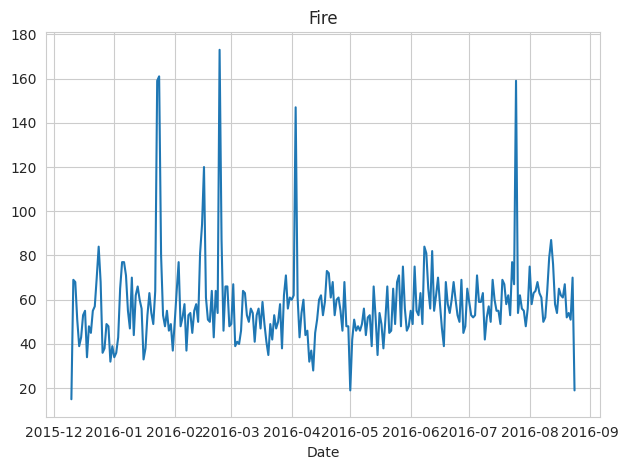

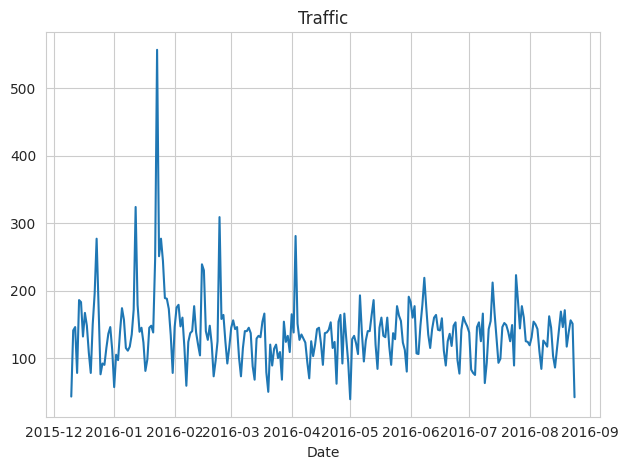

In [ ]:
# prompt: * Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

import matplotlib.pyplot as plt
reasons = df['Reason'].unique()

for reason in reasons:
  df[df['Reason'] == reason].groupby('Date').count()['lat'].plot()
  plt.title(reason)
  plt.tight_layout()
  plt.show()


____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [ ]:
# prompt: * Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!**

dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

In [ ]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

In [ ]:
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

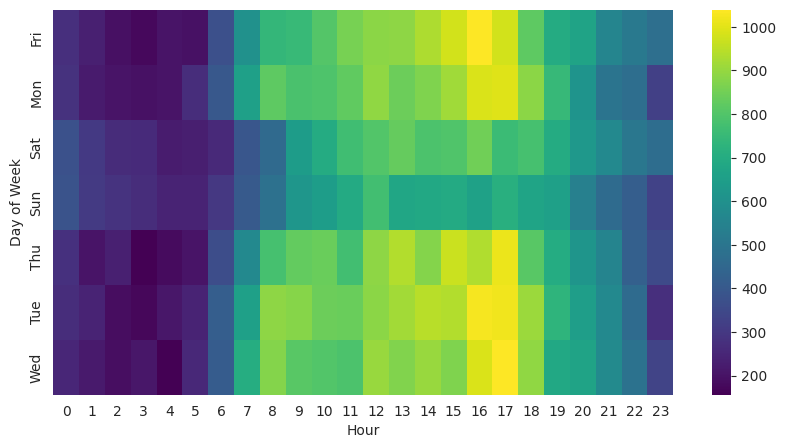

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour, cmap='viridis')
plt.show()

** Now create a clustermap using this DataFrame. **

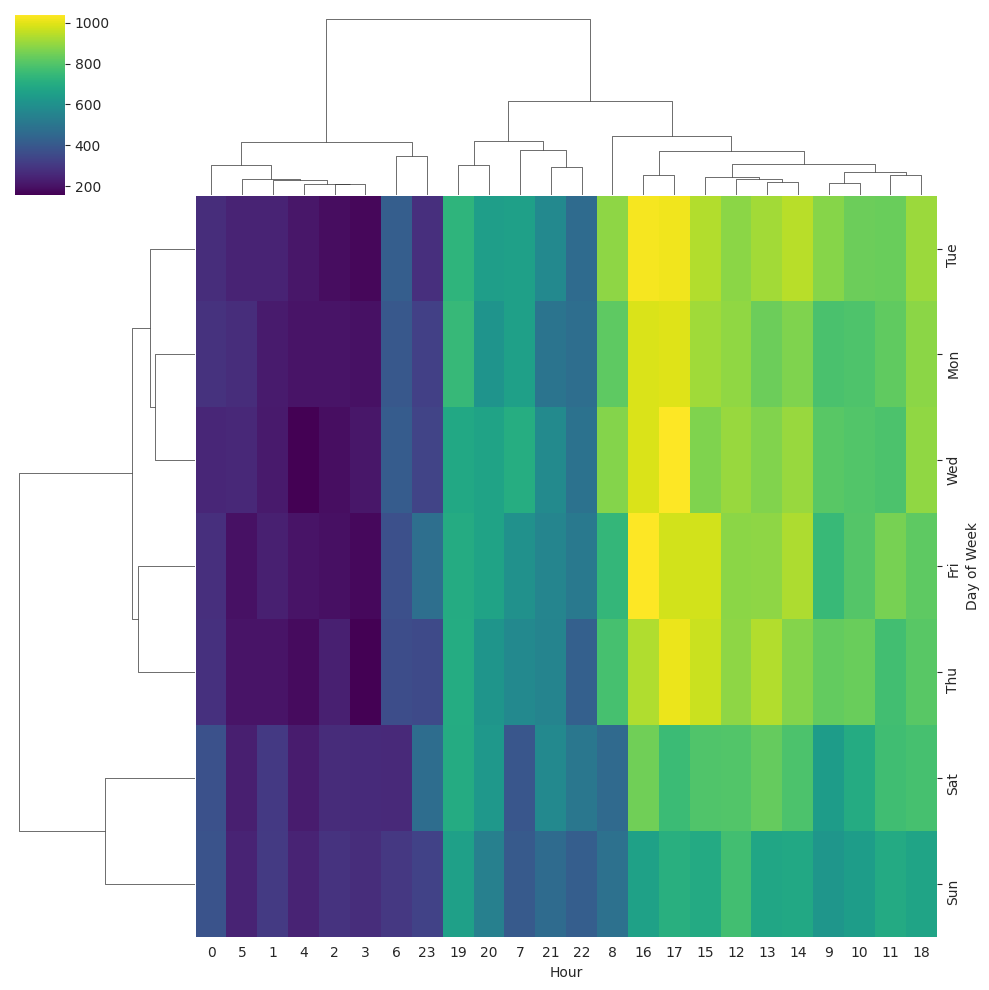

In [ ]:
sns.clustermap(dayHour, cmap='viridis')
plt.show()

In [ ]:
# prompt: ** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
#dayMonth.head()
#sns.heatmap(dayMonth,cmap='viridis')
#plt.show()
#sns.clustermap(dayMonth,cmap='viridis')
plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [ ]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

In [ ]:
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


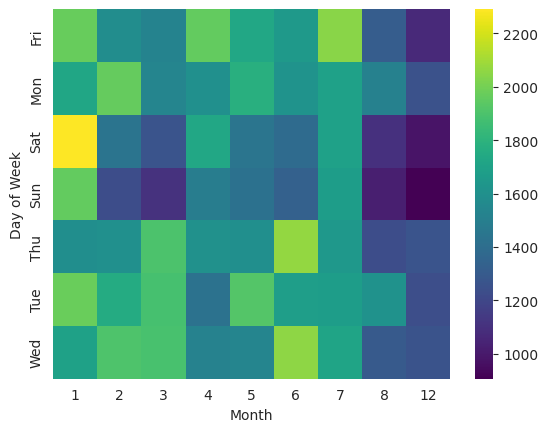

In [ ]:
sns.heatmap(dayMonth,cmap='viridis')
plt.show()

<Figure size 1000x500 with 0 Axes>

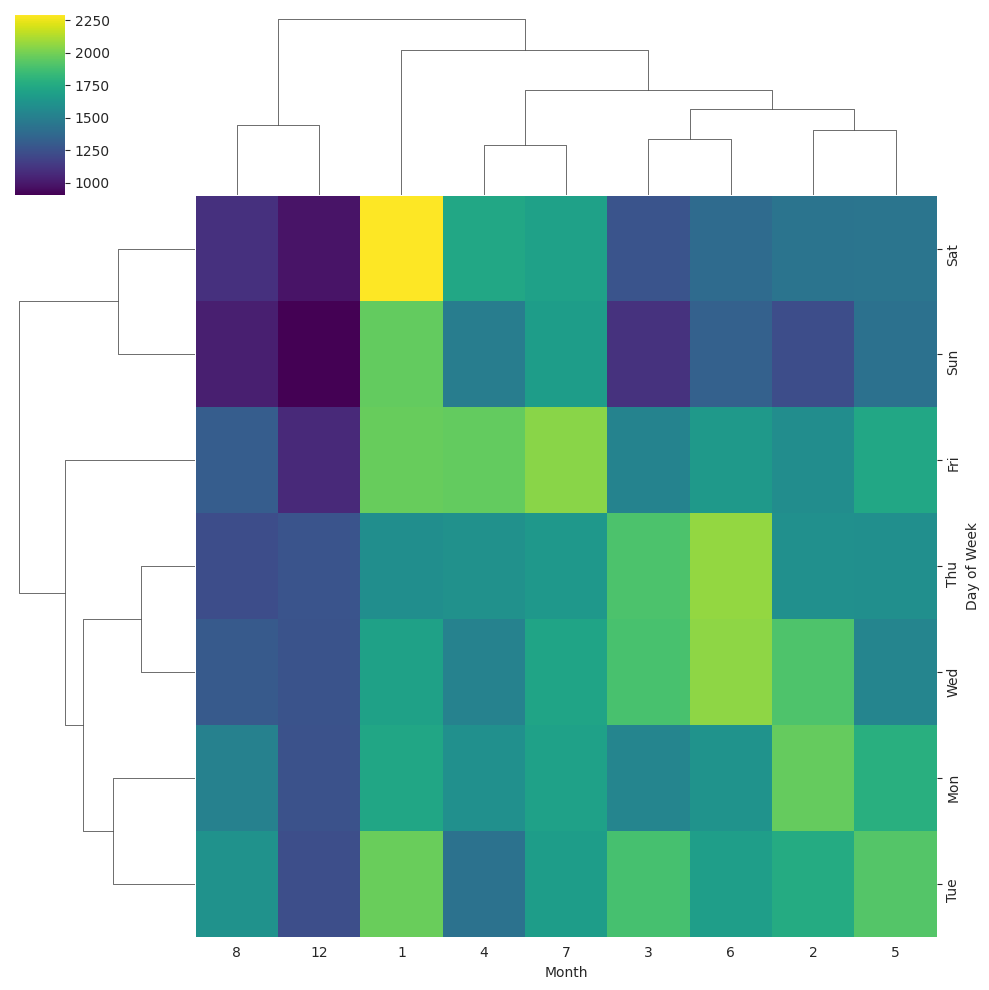

In [ ]:
plt.figure(figsize=(10,5))
sns.clustermap(dayMonth,cmap='viridis')
plt.show()

**Continue exploring the Data however you see fit!**
# Great Job!

In [ ]:
# prompt: Continue exploring the Data however you see fit!

import matplotlib.pyplot as plt
# Further exploration: Explore calls by hour and month
hourMonth = df.groupby(by=['Hour', 'Month']).count()['Reason'].unstack()
hourMonth.head()


Month,1,2,3,4,5,6,7,8,12
Hour,,,,,,,,,
0,294,267,214,243,255,229,241,219,150
1,218,194,181,204,195,192,224,182,131
2,225,161,194,170,158,168,181,166,126
3,205,149,149,161,173,157,188,135,118
4,205,161,152,179,160,148,177,131,105


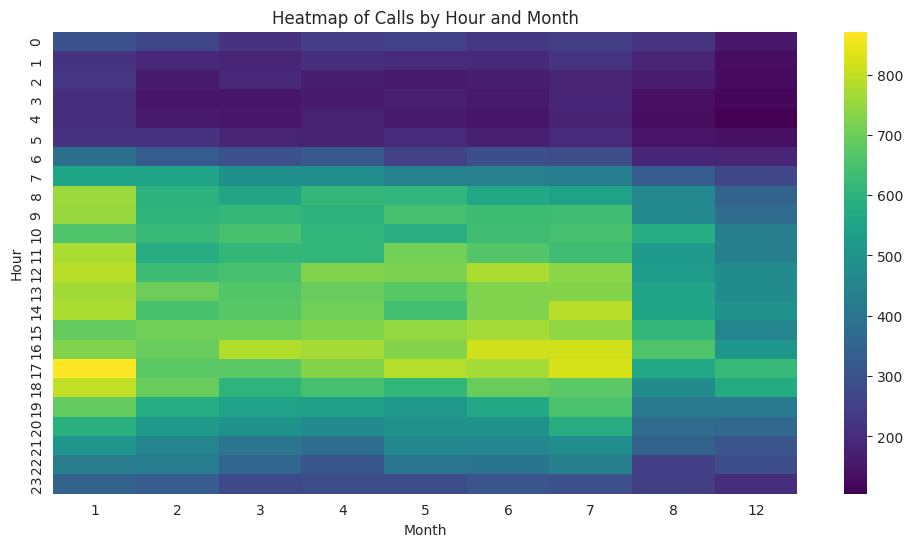

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(hourMonth, cmap='viridis')
plt.title('Heatmap of Calls by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.show()

<Figure size 1200x600 with 0 Axes>

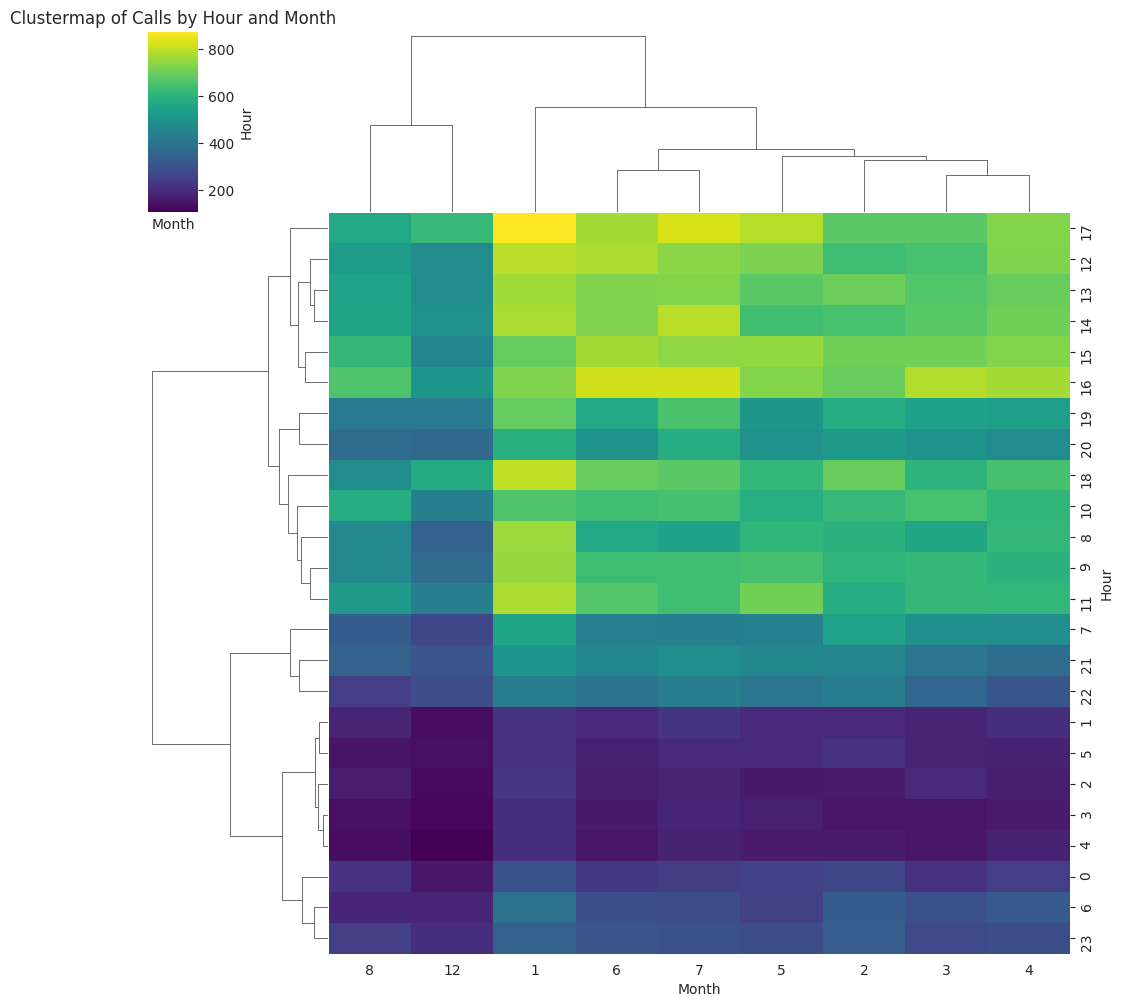

In [ ]:
plt.figure(figsize=(12, 6))
sns.clustermap(hourMonth, cmap='viridis')
plt.title('Clustermap of Calls by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.show()

/tmp/ipython-input-221-4151566392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


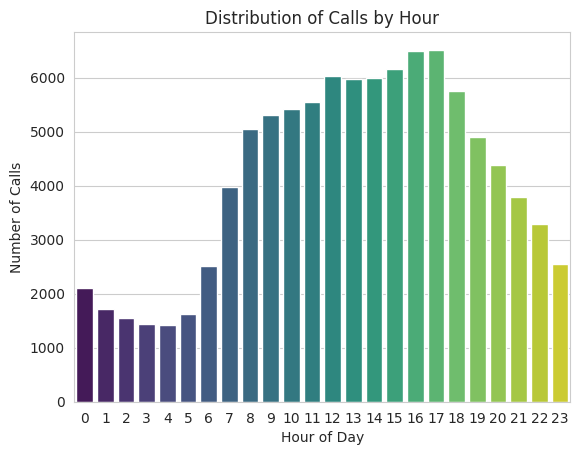

In [ ]:
# Explore the distribution of calls across hours of the day
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Distribution of Calls by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.show()

In [ ]:
# Analyze calls by zipcode and reason
zip_reason = df.groupby(['zip', 'Reason']).size().unstack(fill_value=0)
zip_reason['Total'] = zip_reason.sum(axis=1)
top_zipcodes = zip_reason.sort_values(by='Total', ascending=False).head(10)

print("Top 10 Zipcodes by Call Volume and Reason:")
print(top_zipcodes)

Top 10 Zipcodes by Call Volume and Reason:
Reason    EMS  Fire  Traffic  Total
zip                                
19401.0  4435   907     1637   6979
19464.0  3953  1042     1648   6643
19403.0  2974   598     1282   4854
19446.0  2665   617     1466   4748
19406.0  1677   482     1015   3174
19002.0  1397   439     1214   3050
19468.0  1451   540      999   2990
19454.0  1205   314     1262   2781
19090.0  1257   327     1051   2635
19038.0  1354   420      804   2578


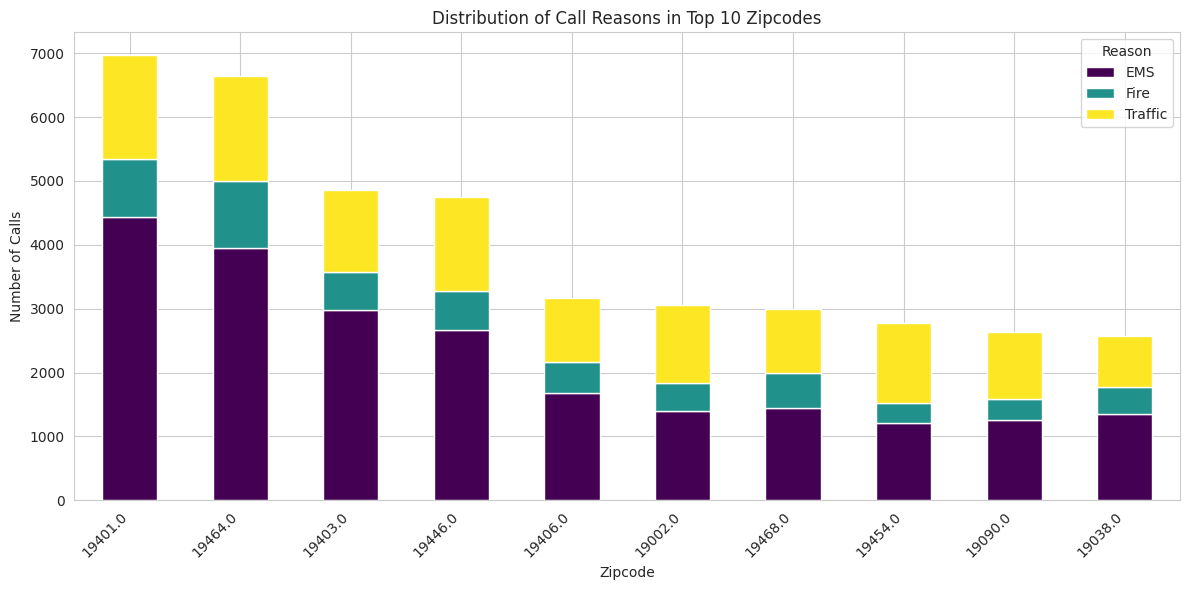

In [ ]:
# Visualize the distribution of Reasons for the top 10 zipcodes
top_zipcodes_reasons = top_zipcodes[['EMS', 'Fire', 'Traffic']]
top_zipcodes_reasons.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Call Reasons in Top 10 Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df=pd.read_csv('911.csv')

NameError: name 'pd' is not defined

In [ ]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('911.csv')

In [ ]:
df.isnull().sum()

,0
lat,0
lng,0
desc,0
zip,6559
title,0
timeStamp,1
twp,23
addr,300
e,1
